In [273]:
import pandas as pd

In [274]:
# To better display the data, styling ipython notebook
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [275]:
# To use vega library for visualization
from vega import VegaLite 



In [276]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt

# In Jupyter Notebook, "%matplotlib inline" can be used to display plots inside the notebook.
%matplotlib inline  

# Seaborn for plotting and styling
import seaborn as sns

# setup configuration for the proper figure sizes
plt.rcParams['figure.figsize'] = (12,8)

In [277]:
# Color Pallette
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

In [278]:
# The training set should be used to build your machine learning models.
traind = pd.read_csv('train.csv')
traind.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [279]:
# The test set should be used to see how well your model performs on unseen data
testd = pd.read_csv('test.csv')
testd.sample(5) # viewing 5 rows randomly

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
392,1284,3,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,NaN,S
270,1162,1,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,75.2417,C6,C
214,1106,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S
43,935,2,"Corbett, Mrs. Walter H (Irene Colvin)",female,30.0,0,0,237249,13.0000,NaN,S
157,1049,3,"Lundin, Miss. Olga Elida",female,23.0,0,0,347469,7.8542,NaN,S


In [280]:
#  set of predictions that assume all and only female passengers survive,
# as an example of what a submission file should look like.
genderd = pd.read_csv('gender_submission.csv')
genderd.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Analysing the training data

In [281]:
traind.shape

(891, 12)

In [282]:
# As above it shows there are 12 columns and 891 rows in training dataset.

# To improve viewablity of dataframe configuring to show 20 columns and increasing the width of each column
pd.set_option('max_columns', 20)
pd.set_option('max_colwidth', 5000)

In [283]:
traind.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [284]:
traind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Pclass, Sex, Age, Cabin and embarked might show interesting insights on the survived people. 

In [285]:
# If required, column names can be modifed. Sample:
#col_name_rename = {col: col.strip().lower().replace(" ", "-") for col in traind.columns}

col_name_rename = {col: col.strip().lower() for col in traind.columns}
rename_temp = traind.rename(columns=col_name_rename)
print(rename_temp.columns.values)

#But will keep the column name as is.

['passengerid' 'survived' 'pclass' 'name' 'sex' 'age' 'sibsp' 'parch'
 'ticket' 'fare' 'cabin' 'embarked']


In [286]:
# Info on training data shows Age, Cabin and Embarked has null fields. Lets verify

traind[traind.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [287]:
traind[traind.Age.isnull()].sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.00,A32,S
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.05,NaN,S
589,590,0,3,"Murdlin, Mr. Joseph",male,NaN,0,0,A./5. 3235,8.05,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
596,597,1,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,248727,33.00,NaN,S


In [288]:
# Cross verifying the counts
len(traind[traind.Age.notnull()])

714

In [289]:
traind[traind.Cabin.isnull()].sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)",female,39.0,1,5,347082,31.2750,NaN,S
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S


In [290]:
# Cross verifying the counts
len(traind[traind.Cabin.notnull()])

204

In [291]:
# verifying unique value to determine whether columns can be used or dropped
def unique_col(df):
    for i in df.columns:
        col_count = df[i].nunique()   
        print("{}: {}" .format(i,col_count))

#  nunique() is used to get a count of unique values.
#  unique() is used to give unique values.
        
unique_col(traind)

PassengerId: 891
Survived: 2
Pclass: 3
Name: 891
Sex: 2
Age: 88
SibSp: 7
Parch: 7
Ticket: 681
Fare: 248
Cabin: 147
Embarked: 3


In [292]:
# dropping null records.
df_temp = traind[traind.Survived.notnull()]
df_temp = pd.DataFrame((traind.groupby('Survived').size()),columns=['Count'])
df_temp

,Count
Survived,
0,549
1,342


In [293]:
df_temp = df_temp.reset_index()


In [294]:
df_temp['Total'] = df_temp.Count.sum()

In [295]:
df_temp['% of people'] = (df_temp.Count/(df_temp.Count.sum()))*100

In [296]:
df_temp

,Survived,Count,Total,% of people
0,0,549,891,61.616162
1,1,342,891,38.383838


## 61% people didn't survive

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Survival Status')

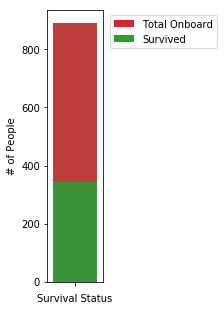

In [297]:

#Stacked bar plot
sns.set_context({"figure.figsize": (1, 5)})

sns.barplot( df_temp.Total, color = tableau20[6], orient="v")
bottom_plot = sns.barplot(df_temp[df_temp.Survived == 1].Count, color = tableau20[4], orient="v")

# Drawing a legend
topbar = plt.Rectangle((0,0),1,1,fc=tableau20[6], edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc=tableau20[4],  edgecolor = 'none')
l = plt.legend([topbar, bottombar], ['Total Onboard', 'Survived'],bbox_to_anchor=(1.04,1), prop={'size':10}) 
l.draw_frame(True)

# Settng x-axis label
bottom_plot.set_ylabel("# of People")
bottom_plot.set_xlabel("Survival Status")

### Stacked Bar Chart showing only a small % of people surviving - 38%

In [298]:
df = traind
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q
293,294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S


In [299]:
pclass_pivot = df.pivot_table(index="Pclass",values="Survived")
pclass_pivot

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### 62% of people from 1st class survived but only 24% of people from 3rd Class

In [300]:
# checking correlation between Pclass and Survived,

df['Pclass'].corr(df['Survived']) # there is a slight negative linear relation between both Pclass and Survived

-0.3384810359610147

### Plotting the class survival information

In [301]:
df = df[['Pclass','Survived']]

In [302]:
df.head()

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


In [303]:
df_total = pd.DataFrame(df['Pclass'].value_counts())
df_total = df_total.reset_index()
df_total = df_total.rename(columns={"index": "Pclass", "Pclass":"Counts"})
df_total

,Pclass,Counts
0,3,491
1,1,216
2,2,184


In [304]:

df = pd.DataFrame(df.groupby(['Survived','Pclass']).size(),columns=['Count'])
df = df.reset_index()

#df = pd.DataFrame((traind.groupby(['Survived',(traind.Age // 10 * 10).fillna(0).astype(int)]).size()),columns=['Count'])
#df_temp.sample(2)

In [305]:
df.head()

,Survived,Pclass,Count
0,0,1,80
1,0,2,97
2,0,3,372
3,1,1,136
4,1,2,87


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 0, 'Passenger Class')

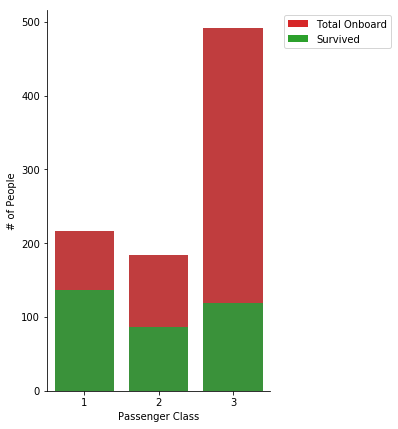

In [306]:
#Stacked bar plot
sns.set_context({"figure.figsize": (4, 7)})

sns.barplot(x=df_total.Pclass,y=df_total.Counts, color = tableau20[6], orient="v")
bottom_plot = sns.barplot(x=df.Pclass,y=df[df.Survived == 1].Count, color = tableau20[4], orient="v")

# Drawing a legend
topbar = plt.Rectangle((0,0),1,1,fc=tableau20[6], edgecolor = 'none')
#bottombar = plt.Rectangle((0,0),1,1,fc=tableau20[4],  edgecolor = 'none')
l = plt.legend([topbar, bottombar], ['Total Onboard', 'Survived'],bbox_to_anchor=(1.04,1), prop={'size':10}) 
l.draw_frame(True)

# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
#ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
#ax.spines["left"].set_visible(False)   

# Settng axis label
bottom_plot.set_ylabel("# of People")
bottom_plot.set_xlabel("Passenger Class")

### More people were killed from the PClass 3 than any other class

In [307]:
df = traind
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.9000,NaN,S
594,595,0,2,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.0000,NaN,S
810,811,0,3,"Alexander, Mr. William",male,26.0,0,0,3474,7.8875,NaN,S
687,688,0,3,"Dakic, Mr. Branko",male,19.0,0,0,349228,10.1708,NaN,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S


In [369]:
df = traind
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [316]:
# Checking statistics on Age

df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Lot of people who were travelling were in the age group of 20-38,
### but there were infants: min=0.42 and old people: max=80

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


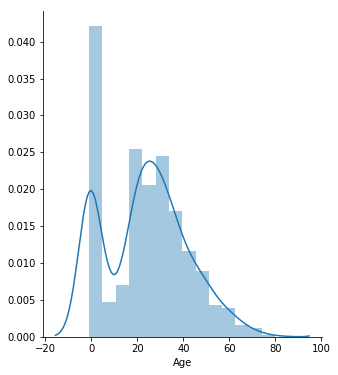

In [445]:
sns.set_context({"figure.figsize": (5, 6)})

# Plotting histogram for same
sns.distplot(df.Age.fillna(-1))  # -1 is filled for rows which have no data.

# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
#ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
#ax.spines["left"].set_visible(False)   




In [310]:
# Plotting survival ratio of pepole for different age groups.

In [407]:
df_total = df['Age'] 
df_total = pd.DataFrame(df_total.fillna(-10))

df_total = pd.DataFrame((df_total.Age // 10 *10).value_counts().sort_index())
df_total = df_total.reset_index()
df_total = df_total.rename(columns={"Age":"Count","index":"AgeGroup"})
df_total.head()


,AgeGroup,Count
0,-10.0,177
1,0.0,62
2,10.0,102
3,20.0,220
4,30.0,167


In [426]:
#df.head
df_sur = df[['Age', 'Survived']] 
df_sur = df_sur[df_sur.Survived == 1] 
df_sur = pd.DataFrame(df_sur.fillna(-10))

df_sur = pd.DataFrame((df_sur.Age // 10 *10).value_counts().sort_index())
df_sur = df_sur.reset_index()
df_sur = df_sur.rename(columns={"Age":"Count","index":"AgeGroup"})
df_sur.head()

,AgeGroup,Count
0,-10.0,52
1,0.0,38
2,10.0,41
3,20.0,77
4,30.0,73


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 0, '# of People')

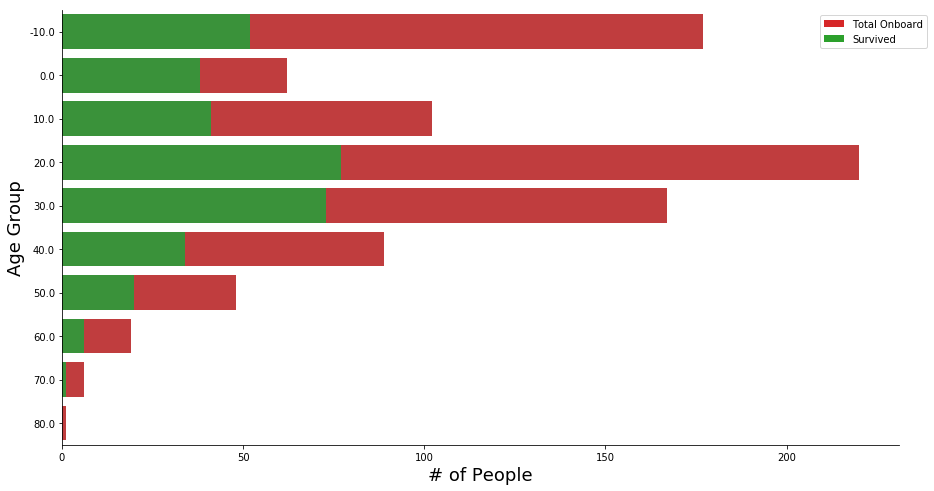

In [439]:
#Stacked bar plot
sns.set_context({"figure.figsize": (15, 8)})

sns.barplot(x=df_total.Count,y=df_total.AgeGroup, color = tableau20[6], orient="h")
bottom_plot = sns.barplot(x=df_sur.Count,y=df_total.AgeGroup, color = tableau20[4], orient="h")

# Drawing a legend
topbar = plt.Rectangle((0,0),1,1,fc=tableau20[6], edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc=tableau20[4],  edgecolor = 'none')
l = plt.legend([topbar, bottombar], ['Total Onboard', 'Survived'],bbox_to_anchor=(1.04,1), prop={'size':10}) 
l.draw_frame(True)

# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
#ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
#ax.spines["left"].set_visible(False)   

# Settng axis label
bottom_plot.set_ylabel("Age Group", fontsize=18)
bottom_plot.set_xlabel("# of People" , fontsize=18)

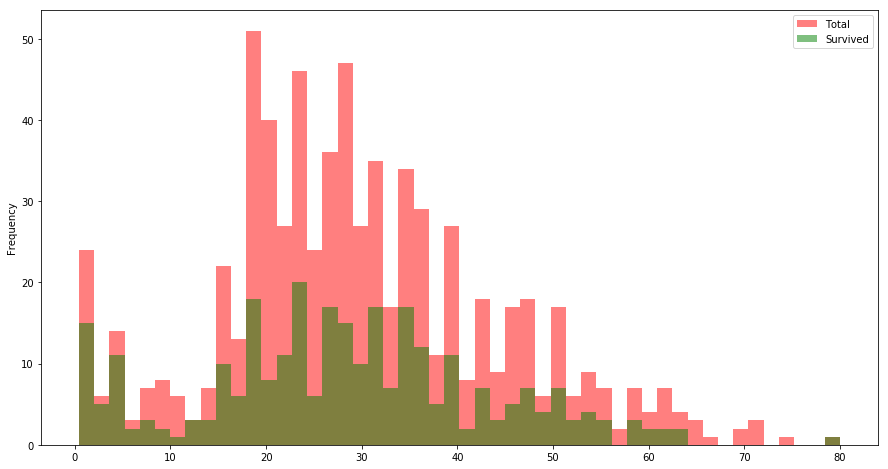

In [441]:
# Histogram of the above chart but using only matplotlib.

df = traind
survived = df[df["Survived"] == 1]
total = df
#died = traind[traind["Survived"] == 0]

total["Age"].plot.hist(alpha=0.5,color='red',bins=50)
survived["Age"].plot.hist(alpha=0.5,color='green',bins=50)

plt.legend(['Total','Survived'])
plt.show()

In [ ]:
# The relationship here is not simple, but we can see that in some age ranges
# more passengers survived - where the red bars are higher than the blue bars.

# In order for this to be useful to our machine learning model,
# we can separate this continuous feature into a categorical feature by dividing it into ranges.
# We can use the pandas.cut() function to help us out.

In [461]:
# The pandas.cut() function has two required parameters:
# - the column we wish to cut, and
# - a list of numbers which define the boundaries of our cuts.

# Other optional paramter used here 
# - labels, which takes a list of labels for the resultant bins. 

In [447]:
# Creating class for age group

#Missing, from -1 to 0
#Infant, from 0 to 5
#Child, from 5 to 12
#Teenager, from 12 to 19
#Young Adult, from 19 to 35
#Adult, from 35 to 60
#Senior, from 60 to 100
# ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']


In [448]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0, 5, 12, 19, 35, 60, 100]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

train = process_age(traind,cut_points,label_names)
test = process_age(testd,cut_points,label_names)

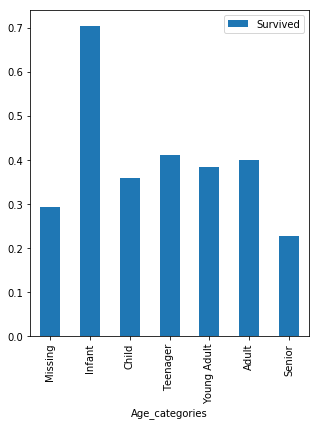

In [449]:
age_cat_pivot = train.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar()
plt.show()

In [451]:
sex_pivot = df.pivot_table(index='Sex',values='Survived')
sex_pivot

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
### Basic analysis done.


#  <font color='green'>__Part__</font> 

## Preparing Data

In [ ]:
# We need to prepare these columns for machine learning.
# Most machine learning algorithms can't understand text labels,
# so we have to convert our values into numbers.

In [453]:
# create dummy columns using pandas.get_dummies() method for both Sex and Age_categories columns.

In [455]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,0,1


In [456]:
train = create_dummies(train,"Sex")
test = create_dummies(test,"Sex")
train = create_dummies(train,"Age_categories")
test = create_dummies(test,"Age_categories")

In [457]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


#  <font color='green'>__Part__</font> 

## Creating Machine Learning Model

In [459]:
# The model we will use is called Logistic Regression,
# which is often the first model you will train when performing classification.

# Here classification is being done because
# we have to identify whether gived data for someone,
# we have to predict whether he/she will "survive" or "not"

In [ ]:
#scikit-learn workflow:
# 1) Instantiate (or create) the specific machine learning model you want to use
# 2) Fit the model to the training data
# 3) Use the model to make predictions
# 4) Evaluate the accuracy of the predictions
# 5) Each model in scikit-learn is implemented as a separate class
# and the first step is to identify the class we want to create an instance of.
# In our case, we want to use the LogisticRegression class.

In [460]:
# Step 1) 

# Importing LogisticRegression model from same namesake class
from sklearn.linear_model import LogisticRegression

# Creating Logistic regression object
lr = LogisticRegression()

In [462]:
# Step 2) 

# Using LogisticRegression.fit() to fit the model to the training data

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']


# Use LogisticRegression.fit() to fit (or trains) the model on the train dataset using:
#  - The columns contained in columns as the first (X) parameter.
#  - The Survived column as the second (y) parameter.

lr.fit(train[columns], train['Survived'])

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# There is only one dataset with survived information (actual prediction) to train and test the model.
# - Same data if used for train and test will cause the issue of overfitting i.e.
# prediction will be accurate for same data but will fair poorly for new data.
# To avoid overfitting, separate train and test data is used

# Here train data can be split into two:
# - One part to train our model on (often 80% of the observations)
# - One part to make predictions with and test our model (often 20% of the observations)

# The convention in machine learning is to call these two parts train and test. 

In [ ]:
# Will use model_selection.train_test_split() function from scikit-learn library
# to split our data.

# train_test_split() accepts two parameters:
# - X and y, which contain all the data we want to train and test on, and
# - test_size=0.2,lets us control what proportions our data are split into. Here 20% of data is used for test.
# - random_state=0 helps to reproduce the result.

# Returns four objects:
# - Train data i.e. train_X, test_X (80% data), and  
# - Test data i.e. train_y, test_y (20% data)

In [463]:
from sklearn.model_selection import train_test_split

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2,random_state=0)

In [465]:
train_X.shape

(712, 12)

In [466]:
# Step 3) Making prediction:

# Once we have fit (train) our model, we can use the LogisticRegression.predict() method to make predictions.


In [468]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [472]:
predictions

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [476]:
# Step 4)

# scikit-learn has a handy function we can use to calculate accuracy: metrics.accuracy_score().
# The function accepts two parameters, y_true and y_pred,
# which are the actual values and our predicted values respectively, and returns our accuracy score.


In [474]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_y, predictions)

In [475]:
accuracy

0.7988826815642458

In [477]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, predictions)
pd.DataFrame(conf_matrix, columns=['Survived', 'Died'], index=[['Survived', 'Died']])

,Survived,Died
Survived,94,16
Died,20,49


In [478]:
# Given the data set used is quite small, there is a good chance that our model is overfitting,
# and will not perform as well on totally unseen data.

# Useing a technique called cross validation to train and test our model on
# different splits of our data, and then average the accuracy scores.

In [479]:
# Most common form of cross validation, and the one we will be using, is called k-fold cross validation

In [ ]:
# 'Fold' refers to each different iteration that we train our model on, and 'k' just refers to the number of folds

# We will use scikit-learn's model_selection.cross_val_score() function to automate the process.
# The basic syntax for cross_val_score() is:

# cross_val_score(estimator, X, y, cv=None)

# estimator is a scikit-learn estimator object, like the LogisticRegression() objects we have been creating.
# X is all features from our data set.
# y is the target variables.
# cv specifies the number of folds.


In [481]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression(solver='lbfgs')
scores = cross_val_score(lr, all_X, all_y, cv=10)
np.mean(scores)

0.8024670865963002